<a href="https://colab.research.google.com/github/lvtp2705/CS116-Python_forML/blob/main/CS116_2_19521993.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas

     |████████████████████████████████| 994 kB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 31.8 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 


In [ ]:
!git clone https://github.com/CityScope/CSL_HCMC/

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1930, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (315/315), done.
remote: Total 1930 (delta 308), reused 500 (delta 269), pack-reused 1340
Receiving objects: 100% (1930/1930), 176.98 MiB | 22.55 MiB/s, done.
Resolving deltas: 100% (985/985), done.
Checking out files: 100% (542/542), done.


In [ ]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

In [ ]:
df = gpd.read_file("/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_Ward_Level.shp")
df.head()

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry
0,Tan Dinh,District 1,26734,760,Ward,26571.0,23258.0,41942.70,36713.10,3679.098196,6.334981e+05,"POLYGON ((684350.511 1193546.266, 684363.810 1..."
1,Ben Nghe,District 1,26740,760,Ward,13580.0,10633.0,5480.09,4290.86,6978.149149,2.478041e+06,"POLYGON ((686564.657 1193462.473, 686588.924 1..."
2,Cau Ong Lanh,District 1,26752,760,Ward,12917.0,10737.0,56878.90,47279.50,2260.705105,2.270938e+05,"POLYGON ((685922.373 1190479.807, 685914.160 1..."
3,Nguyen Thai Binh,District 1,26746,760,Ward,13197.0,9716.0,26798.80,19730.00,3320.174618,4.924426e+05,"POLYGON ((685966.333 1190513.667, 685944.353 1..."
4,Co Giang,District 1,26755,760,Ward,18967.0,11517.0,53327.60,32381.20,2525.453814,3.556650e+05,"POLYGON ((685514.573 1190211.431, 685547.521 1..."


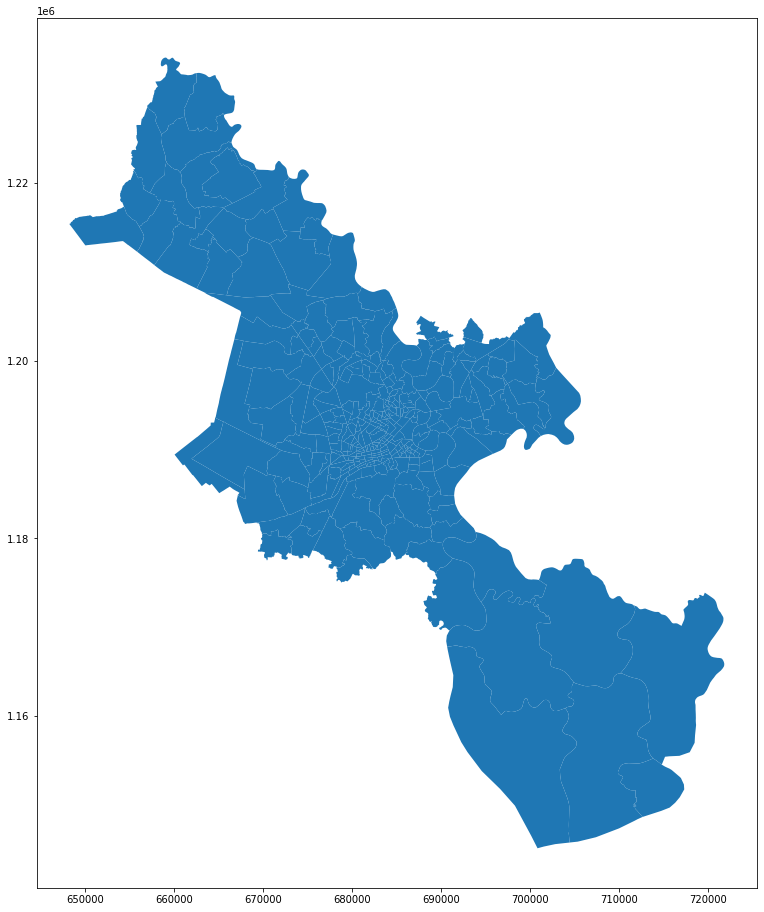

In [ ]:
df.plot(figsize=(16, 16))
plt.show()

In [ ]:
df = df.to_crs(epsg=4326)
print(df.crs)
df.head()

epsg:4326


,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry
0,Tan Dinh,District 1,26734,760,Ward,26571.0,23258.0,41942.70,36713.10,3679.098196,6.334981e+05,"POLYGON ((106.68612 10.79252, 106.68624 10.792..."
1,Ben Nghe,District 1,26740,760,Ward,13580.0,10633.0,5480.09,4290.86,6978.149149,2.478041e+06,"POLYGON ((106.70636 10.79165, 106.70658 10.791..."
2,Cau Ong Lanh,District 1,26752,760,Ward,12917.0,10737.0,56878.90,47279.50,2260.705105,2.270938e+05,"POLYGON ((106.70033 10.76472, 106.70026 10.764..."
3,Nguyen Thai Binh,District 1,26746,760,Ward,13197.0,9716.0,26798.80,19730.00,3320.174618,4.924426e+05,"POLYGON ((106.70074 10.76502, 106.70054 10.764..."
4,Co Giang,District 1,26755,760,Ward,18967.0,11517.0,53327.60,32381.20,2525.453814,3.556650e+05,"POLYGON ((106.69659 10.76231, 106.69689 10.762..."


In [ ]:
m = folium.Map(location=[10.70, 106.94], zoom_start=10, tiles='CartoDB positron')
m

In [ ]:
for _, r in df.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
df = df.to_crs(epsg=2263)
df['centroid'] = df.centroid

In [ ]:
df = df.to_crs(epsg=4326)

df['centroid'] = df['centroid'].to_crs(epsg=4326)

df.head()

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,centroid
0,Tan Dinh,District 1,26734,760,Ward,26571.0,23258.0,41942.70,36713.10,3679.098196,6.334981e+05,"POLYGON ((106.68612 10.79252, 106.68624 10.792...",POINT (106.69063 10.79266)
1,Ben Nghe,District 1,26740,760,Ward,13580.0,10633.0,5480.09,4290.86,6978.149149,2.478041e+06,"POLYGON ((106.70636 10.79165, 106.70658 10.791...",POINT (106.70463 10.78059)
2,Cau Ong Lanh,District 1,26752,760,Ward,12917.0,10737.0,56878.90,47279.50,2260.705105,2.270938e+05,"POLYGON ((106.70033 10.76472, 106.70026 10.764...",POINT (106.69677 10.76539)
3,Nguyen Thai Binh,District 1,26746,760,Ward,13197.0,9716.0,26798.80,19730.00,3320.174618,4.924426e+05,"POLYGON ((106.70074 10.76502, 106.70054 10.764...",POINT (106.70122 10.76867)
4,Co Giang,District 1,26755,760,Ward,18967.0,11517.0,53327.60,32381.20,2525.453814,3.556650e+05,"POLYGON ((106.69659 10.76231, 106.69689 10.762...",POINT (106.69357 10.76216)


In [ ]:
for _, r in df.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)
m